# Covid-19 in Thailand Analysis
### Data source : https://raw.githubusercontent.com/wiki/djay/covidthailand/cases_briefings

### Get data & import library

In [255]:
import numpy as np
import matplotlib.pyplot as plt
import requests

%matplotlib inline

In [256]:
res = requests.get('https://raw.githubusercontent.com/wiki/djay/covidthailand/cases_briefings');
data = json.loads(res.text);

x = np.arange(0,len(data));

start_date = data[0]['Date'];
end_date = data[len(data)-1]['Date'];

### Cases
- Number of cases
- Area prison cases
- Asymptomatic cases
- Imported cases
- Local transmission cases
- Proactive cases
- Symptomatic cases
- Walkin cases

In [257]:
def get_data(i,field):
    return data[i][field];
    
def filt(ar):
    for i in range(len(ar)):
        if(np.isnan(ar[i])):
            if(i>0):
                ar[i]=ar[i-1];
            else:
                ar[i]=0;

In [258]:
np_zeros = np.zeros(len(data));
num_cases = np_zeros.copy();
prison_cases = np_zeros.copy();
asym_cases = np_zeros.copy();
imp_cases = np_zeros.copy();
local_tran_cases = np_zeros.copy();
proactive_cases = np_zeros.copy();
sym_cases = np_zeros.copy();
walk_cases = np_zeros.copy();

for i in range(len(data)):
    num_cases[i]=get_data(i,"Cases");
    prison_cases[i]=get_data(i,"Cases Area Prison");
    asym_cases[i]=get_data(i,"Cases Asymptomatic");
    imp_cases[i]=get_data(i,"Cases Imported");
    local_tran_cases[i]=get_data(i,"Cases Local Transmission");
    proactive_cases[i]=get_data(i,"Cases Proactive");
    sym_cases[i]=get_data(i,"Cases Symptomatic");
    walk_cases[i]=get_data(i,"Cases Walkin");
filt(num_cases);
filt(prison_cases);
filt(asym_cases);
filt(imp_cases);
filt(local_tran_cases);
filt(proactive_cases);
filt(sym_cases);
filt(walk_cases);

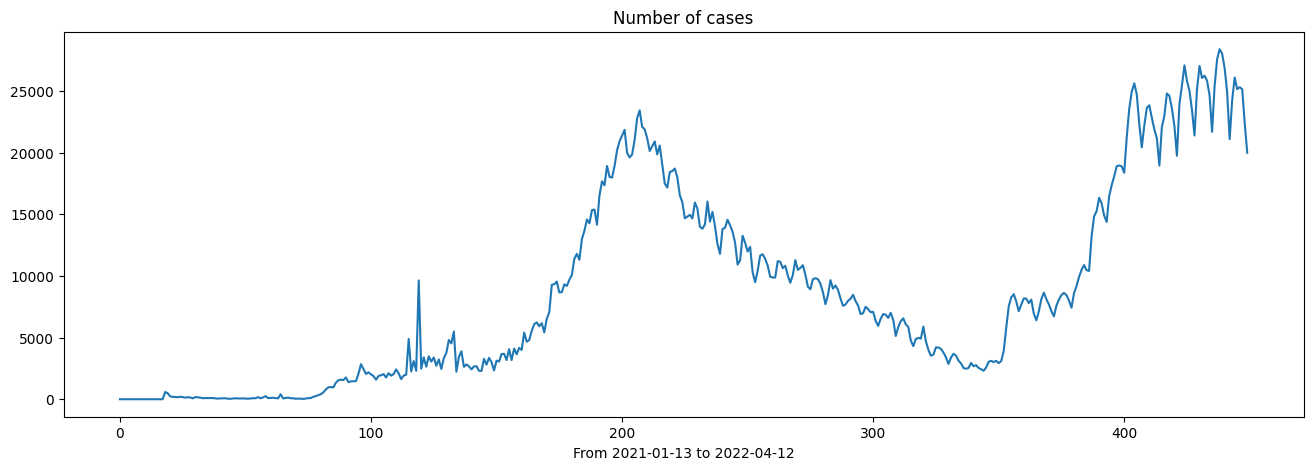

In [259]:
plt.figure(figsize=(16, 5))
plt.plot(x,num_cases);
plt.title("Number of cases");
plt.xlabel("From " + start_date + " to " + end_date);

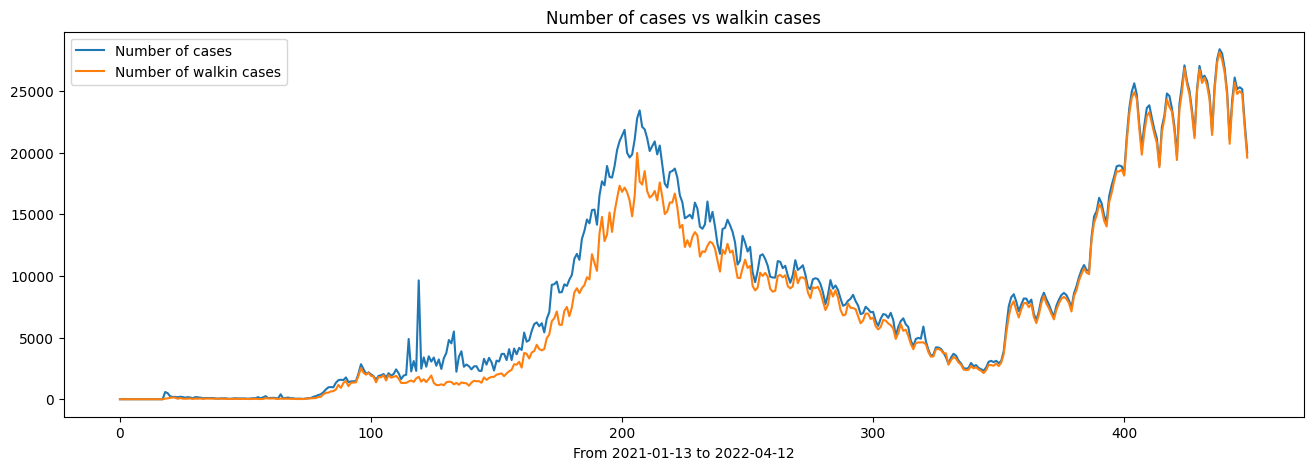

In [260]:
plt.figure(figsize=(16, 5))
plt.plot(x,num_cases,label="Number of cases");
plt.plot(x,walk_cases,label="Number of walkin cases");
plt.title("Number of cases vs walkin cases");
plt.xlabel("From " + start_date + " to " + end_date);
plt.legend();

Walkin cases are slightly lower than number of all cases.

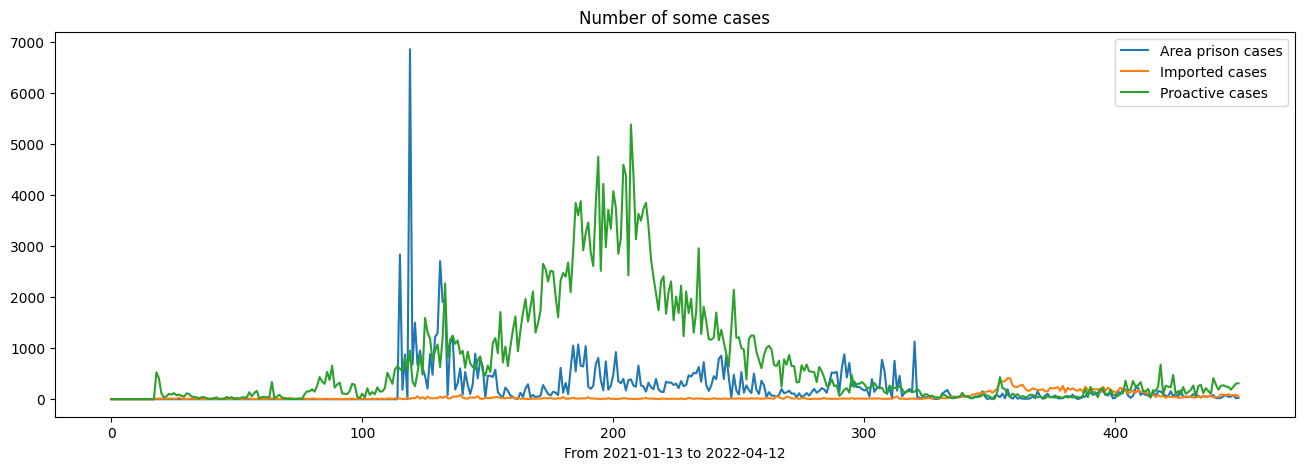

In [261]:
plt.figure(figsize=(16, 5))
plt.plot(x,prison_cases,label="Area prison cases");
plt.plot(x,imp_cases,label="Imported cases");
plt.plot(x,proactive_cases,label="Proactive cases");
plt.legend();
plt.title("Number of some cases");
plt.xlabel("From " + start_date + " to " + end_date);

Other cases' data are mostly nan, so I didn't put them in the graph.

You can see that in Area prison cases graph there is a day that has almost 7000 infected which is 2021-05-17.

### Death
- Number of death
- Death age median
- Death male/female

In [262]:
num_death = np_zeros.copy();
death_med = np_zeros.copy();
cnt_male = 0;
cnt_female = 0;
for i in range(len(data)):
    num_death[i]=data[i]["Deaths"];
    death_med[i]=data[i]["Deaths Age Median"];
    if(data[i]["Date"]=="2021-08-09"):
        continue;
    cnt_male+=data[i]["Deaths Male"];
    cnt_female+=data[i]["Deaths Female"];
    
filt(num_death);
filt(death_med);

all_med = np.median(death_med);

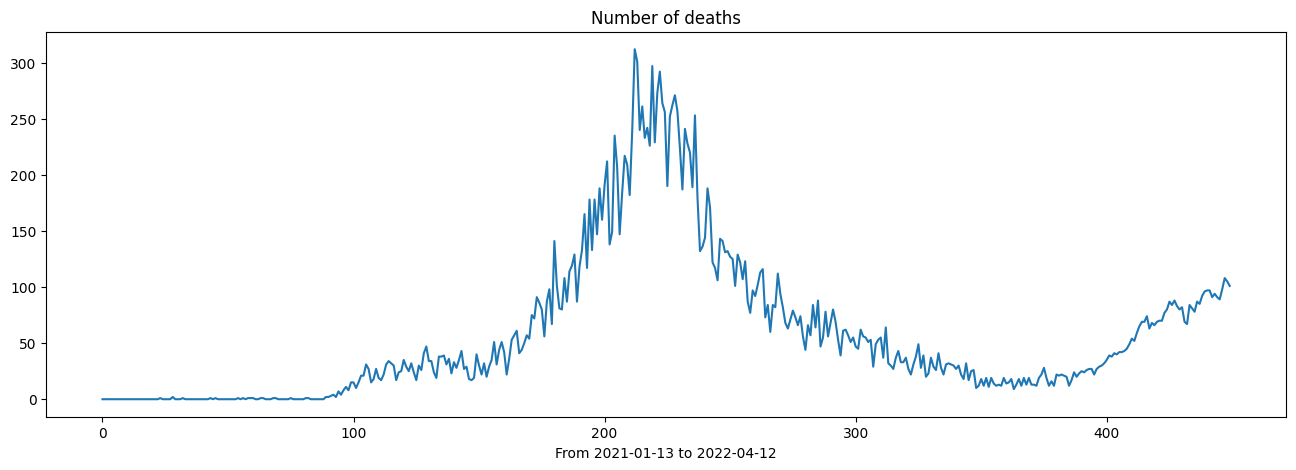

In [263]:
plt.figure(figsize=(16, 5))
plt.plot(x,num_death);
plt.title("Number of deaths");
plt.xlabel("From " + start_date + " to " + end_date);

Median :  68.0


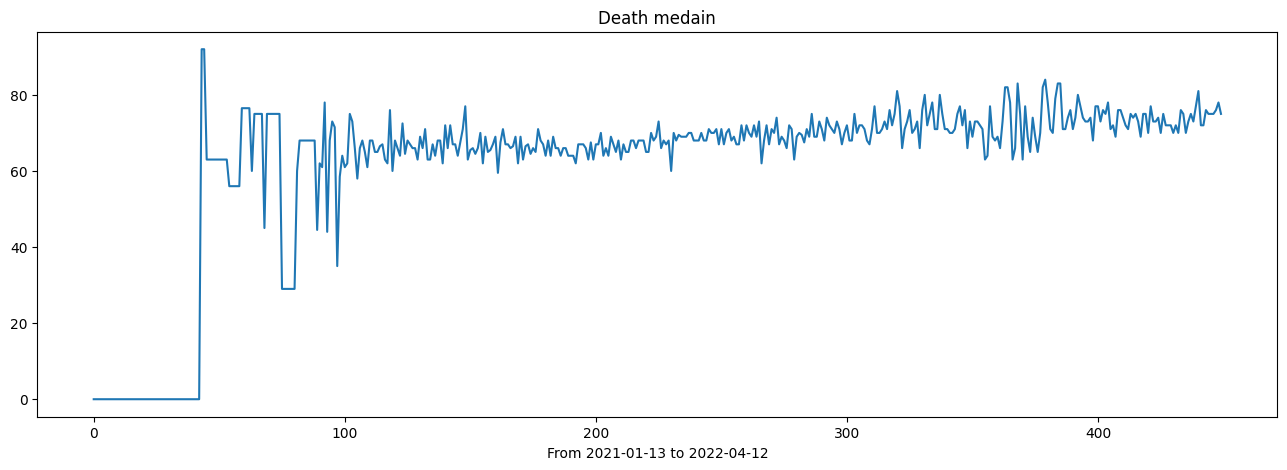

In [264]:
plt.figure(figsize=(16, 5))
plt.plot(x,death_med);
plt.title("Death medain");
plt.xlabel("From " + start_date + " to " + end_date);
print("Median : ",np.median(death_med));

Some of data are wrong. T^T

The medains are in range 60-80.

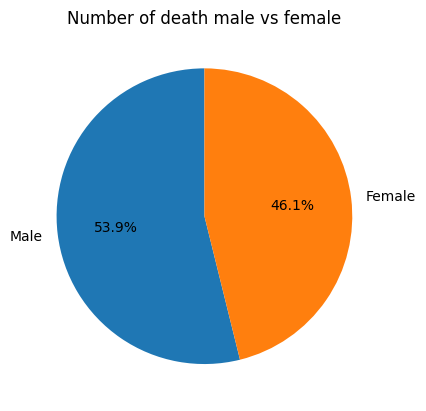

In [265]:
label = "Male","Female";
size = [cnt_male,cnt_female];
plt.pie(size,labels=label,autopct='%1.1f%%',startangle=90);
plt.title("Number of death male vs female");

### Recovered

In [266]:
num_rec = np_zeros.copy();

for i in range(len(data)):
    num_rec[i]=data[i]["Recovered"];

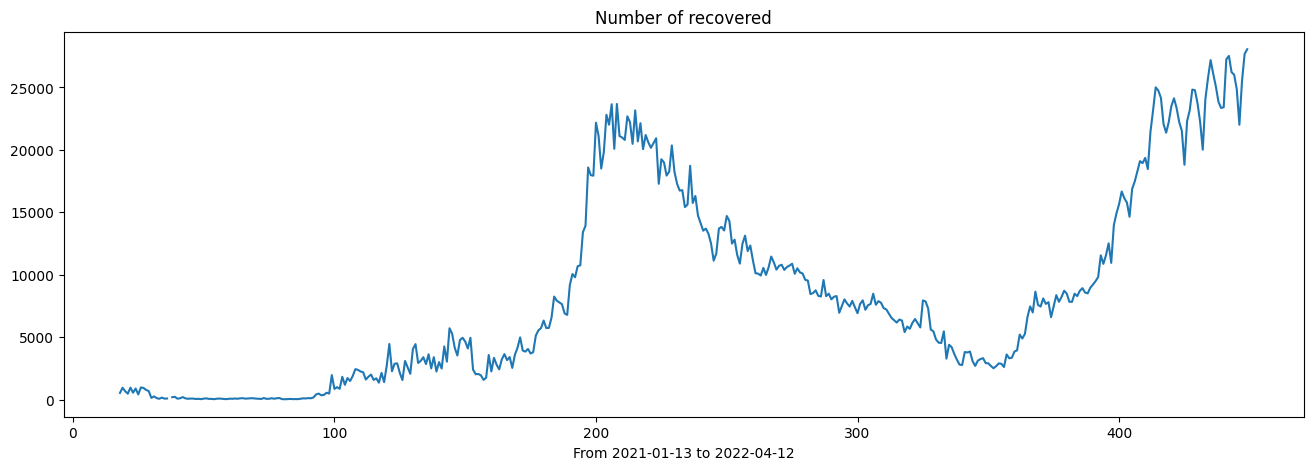

In [267]:
plt.figure(figsize=(16, 5))
plt.plot(x,num_rec);
plt.title("Number of recovered");
plt.xlabel("From " + start_date + " to " + end_date);